In [6]:
# %load deep_module.py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
from tensorflow.keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


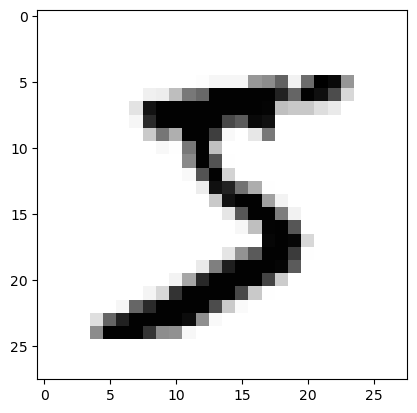

In [8]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [9]:
# 이미지가 저장된 배열 값확인
for x in X_train[0]:
    for i in x:
        print("%-3s" % i, end='')
    print()

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [10]:
# 데이터 정규화 및 해렬 reshape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

print(np.unique(y_train)) # 클래스 확인(10개)

[0 1 2 3 4 5 6 7 8 9]


In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                      

In [16]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './data/model/all/cnn-{epoch:03d}-{val_accuracy:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stop, checkpointer])


Epoch 1: val_loss improved from inf to 0.07841, saving model to ./data/model/all\cnn-001-0.9765.hdf5

Epoch 2: val_loss improved from 0.07841 to 0.06007, saving model to ./data/model/all\cnn-002-0.9819.hdf5

Epoch 3: val_loss improved from 0.06007 to 0.04979, saving model to ./data/model/all\cnn-003-0.9857.hdf5

Epoch 4: val_loss did not improve from 0.04979

Epoch 5: val_loss improved from 0.04979 to 0.04254, saving model to ./data/model/all\cnn-005-0.9865.hdf5

Epoch 6: val_loss did not improve from 0.04254

Epoch 7: val_loss improved from 0.04254 to 0.04099, saving model to ./data/model/all\cnn-007-0.9877.hdf5

Epoch 8: val_loss improved from 0.04099 to 0.04055, saving model to ./data/model/all\cnn-008-0.9882.hdf5

Epoch 9: val_loss did not improve from 0.04055

Epoch 10: val_loss did not improve from 0.04055

Epoch 11: val_loss improved from 0.04055 to 0.04039, saving model to ./data/model/all\cnn-011-0.9895.hdf5

Epoch 12: val_loss did not improve from 0.04039

Epoch 13: val_loss

In [17]:
print('Test accuracy : %.4f' % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 4s 13ms/step - loss: 0.0355 - accuracy: 0.9915
Test accuracy : 0.9915


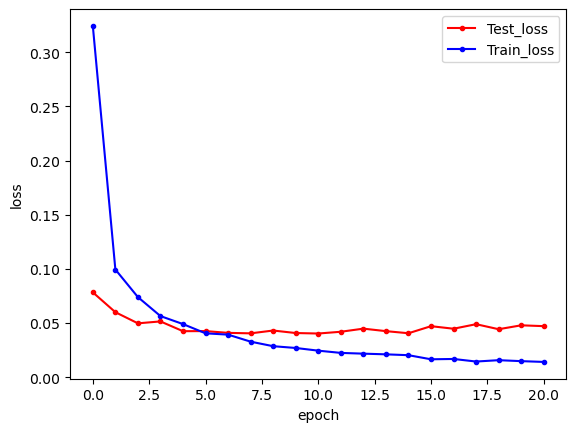

In [18]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_num = np.arange(len(y_vloss))

plt.plot(x_num, y_vloss, marker='.', c='red', label='Test_loss')
plt.plot(x_num, y_loss, marker='.', c='blue', label='Train_loss')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

In [19]:
# 학습정확도, 검증정확도, 테스트 정확도 출력
print('학습 정확도 : ', history.history['accuracy'][-1])
print('검증 정확도 : ', history.history['val_accuracy'][-1])
print('테스트 정확도 : ', history.history['accuracy'][-1])
print('학습정확도 : ', model.evaluate(X_test, y_test)[1])

학습 정확도 :  0.9953110814094543
검증 정확도 :  0.9893333315849304
테스트 정확도 :  0.9953110814094543
313/313 [==============================] - 4s 13ms/step - loss: 0.0355 - accuracy: 0.9915
학습정확도 :  0.9915000200271606
